## Essential Libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./Fraud.csv')

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Checking Missing Data

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
mapping = {'PAYMENT': 0, 'TRANSFER': 1, 'CASH_OUT': 2, 'DEBIT': 3, 'CASH_IN': 4}
df['type'] = df['type'].map(mapping)
df['type'] = df['type'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(1), int64(3), object(2)
memory usage: 509.7+ MB


In [9]:
legit  = len(df[df.isFraud == 0])
fraud  = len(df[df.isFraud == 1])
legit_per = (legit / (fraud + legit)) * 100
fraud_per = (fraud / (fraud + legit)) * 100

print("Legit Transactions: ", legit)
print("Fraud Transactions: ", fraud)
print("Percentage of Legit Transactions: {:.4f}%".format(legit_per))
print("Percentage of Fraud Transactions: {:.4f}% ".format(fraud_per))


Legit Transactions:  6354407
Fraud Transactions:  8213
Percentage of Legit Transactions: 99.8709%
Percentage of Fraud Transactions: 0.1291% 


##### Results prove that data is unbalanced data as percentage of legit transactions and precentage of fraud transactions, so decision trees and random forests are good methods

In [10]:
# Merchants
Merchants = df[df['nameDest'].str.contains('M')]
Merchants.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,0,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,0,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,0,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,0,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


##### For merchants no information regarding the attributes oldbalanceDest and newblanaceDest

## Visualization

In [11]:
df_new = df.drop(columns=['nameOrig','nameDest'])

<Axes: >

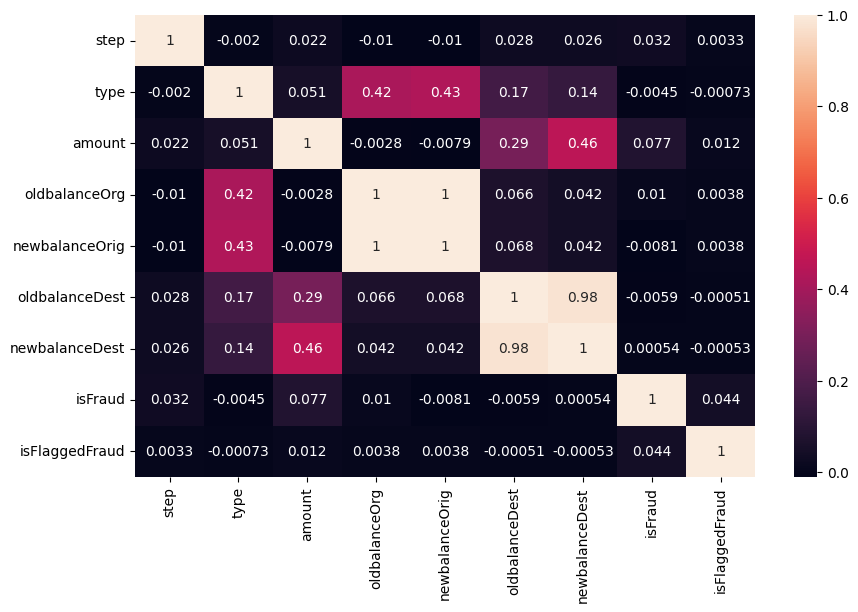

In [12]:
corr= df_new.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot= True)

In [13]:
df['type'].unique()

array([0, 1, 2, 3, 4])

#### Number od legit and Fraud transactions 

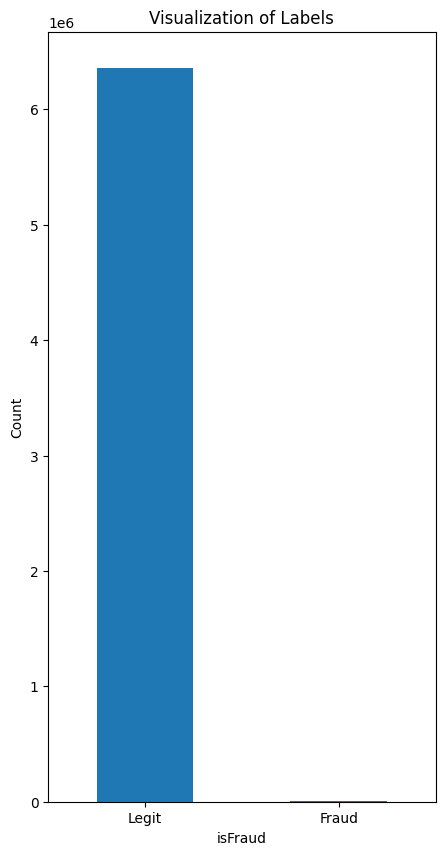

In [14]:
plt.figure(figsize=(5,10))
labels = ['Legit','Fraud']
count_classes = df.value_counts(df['isFraud'],sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

##### Problem Solving 

In [15]:
new_df = df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,0,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,2,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,0,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [16]:
# Checking Type of attributes of datatype: "object"

objList = new_df.select_dtypes(include = 'object').columns
objList

Index(['nameOrig', 'nameDest'], dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [19]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,0,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,1,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,2,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,0,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
def calc_vif(df):
    vif = pd.DataFrame()
    vif['variables'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,3.250236
1,type,3.551975
2,amount,4.190354
3,nameOrig,3.263531
4,oldbalanceOrg,616.417532
5,newbalanceOrig,628.176166
6,nameDest,2.275623
7,oldbalanceDest,74.639735
8,newbalanceDest,86.171265
9,isFraud,1.204483


##### We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.
##### Thus, combining these pairs of collinear attributes and drop the individual ones.

In [22]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x:x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x:x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x:x['nameOrig'] - x['nameDest'],axis=1)


In [23]:
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'], axis=1)
calc_vif(new_df)

,variables,VIF
0,type,2.440681
1,amount,4.072687
2,isFraud,1.202063
3,isFlaggedFraud,1.002686
4,Actual_amount_orig,1.460795
5,Actual_amount_dest,3.867601
6,TransactionPath,2.003057


<Axes: >

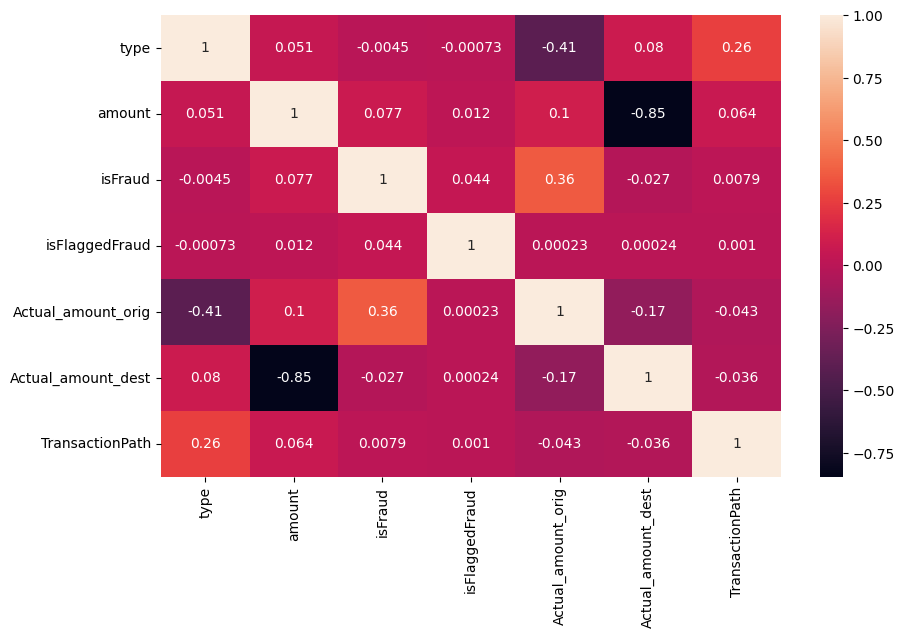

In [24]:
corr = new_df.corr()

plt.figure(figsize= (10,6))
sns.heatmap(corr, annot=True)

## Model Building

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [26]:
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

In [27]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X,Y, test_size=0.3, random_state=42)

print("X Train : ", X_train.shape)
print("X Test : ", X_test.shape)


X Train :  (4453834, 6)
X Test :  (1908786, 6)


## Model Training

In [28]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100


## Model Evaluation

In [31]:
print('Decision Tree Score : ', decision_tree_score)
print('Random Forest Score : ', random_forest_score)

Decision Tree Score :  99.92309247867493
Random Forest Score :  99.95876960539316


In [32]:
print("TP,FP,TN,FN- Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN- Decision Tree
True Positives: 1710
False Positives: 743
True Negatives: 1905608
False Negatives: 725


In [37]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)


Confusion Matrix - Decision Tree
[[1905608     743]
 [    725    1710]]


In [38]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)


Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.70      0.70      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786



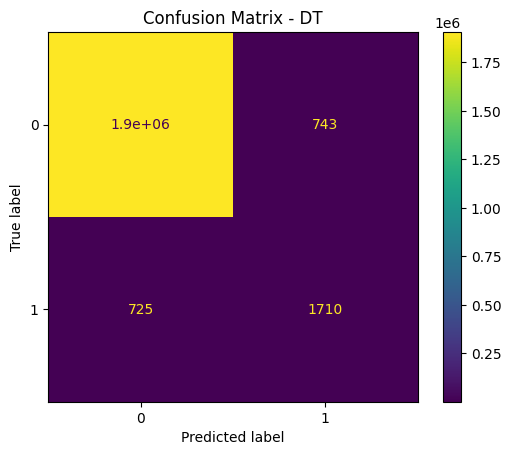

In [39]:
# visualising confusion matrix - DT

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

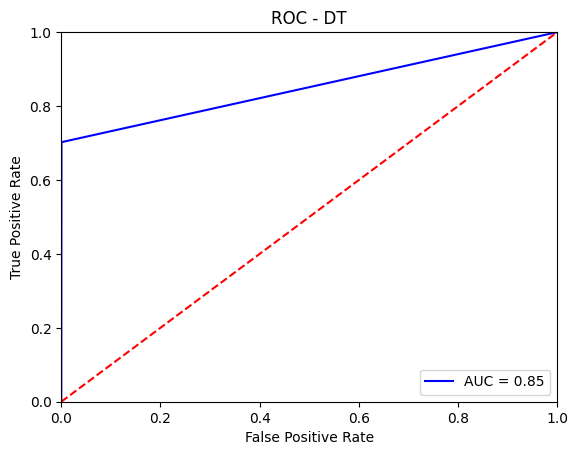

In [40]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Task

We got to know that the accuracy of decision tree in this case is godd and it will provide good decision when it comes to this type of problems. The accuarcy of random forest can also be compared to decision tree but my computer have some issues and not running the random forest classifier. Precision is highly important becuase rather than predicting normal transactions correctly we want fraud transactions to be predicted correctly and Legit. This is also the reason why Decision Tree and Random Forest are used.

Models like XGBoost, Bagging, ANN and Logistic Regression may too give good accuracy but they won't give proper precision and recall values.



## Conclusion
Fraudulent customer will be predicted by checking the source security. The organization responsible for the transaction is valid or not. Transaction history of vendors in this will play a very important role in the prediction of fraud.

##### Prevention measures when updating infrastructures:

1.	Use Smart Verified Apps Only: Download and use applications only from trusted sources such as official app stores (Google Play Store, Apple App Store). Avoid downloading apps from third-party sources, as they might pose security risks.22.	Browse Through Secured Websites: Ensure the websites you visit use secure connections. Look for "https://" in the URL, indicating that the connection is encrypted. Avoid entering sensitive information on websites without a secure connection.3
3.	Use Secured Internet Connections (Use VPN): Virtual Private Network (VPN) enhances online privacy and security by creating a secure connection between your device and the internet. It encrypts data, making it difficult for unauthorized parties to intercept. Use VPNs, especially when connecting to public Wi-Fi networks, to protect against potential threats4
4.	Keep Your Mobile and Laptop Security Updated: Regularly update your device's operating system, applications, and security software. Updates often include patches for vulnerabilities, improving the overall security of your device. Enable automatic updates whenever possibl5.
5.	Don't Respond to Unsolicited Calls/SMS(s)/Emails: Be cautious about communication from unknown sources. Cybercriminals often use unsolicited calls, messages, or emails to trick individuals into providing sensitive information or downloading malicious content. Avoid responding to or clicking on links in messages from unknown sourc6s.
6.	If You Feel Compromised, Contact Your Bank Immediately: In the event of a suspected security compromise, such as unauthorized access to your financial accounts, contact your bank immediately. Prompt action can help mitigate potential financial losses and prevent further unauthorized access.

    cc
##### Determination

1.	Fraud Prevention: Regularly checking your account activity allows you to quickly identify any unauthorized or suspicious transactions. If you notice any discrepancies, you can promptly report them to your bank, helping to prevent further fraud.

2.	Budgeting and Financial Planning: Monitoring your account activity helps you stay on top of your spending patterns and budget. It allows you to track where your money is going, identify areas where you can cut expenses, and plan for future financial goals.

3.	Accuracy of Transactions: Mistakes can occur, and transactions may be recorded incorrectly. By keeping a check on your account activity, you can catch any errors and notify your bank to rectify them.

4.	Alerts and Notifications: Many banks offer account alert services that notify customers of specific activities, such as large transactions, low balances, or unusual account activity. By keeping a log of your payments and regularly reviewing alerts, you can stay informed and take action when necessary.

5.	Record for Tax Purposes: Maintaining a log of your payments and transactions can be useful during tax season. It provides a clear record of your financial activity, making it easier to report income, expenses, and deductions accurately.

6.	DisputeIf you encounter any billing disputes or discrepancies with merchants, having a detailed record of your payments and transactions can be valuable in resolving these issues with both the merchant and your bank.

To effectively keep a log of your payments, you can use tools like a financial tracking app, a spreadsheet, or simply make notes in a dedicated notebook. Regularly update this log with details such as the date, amount, and purpose of each transaction.
ized access.

